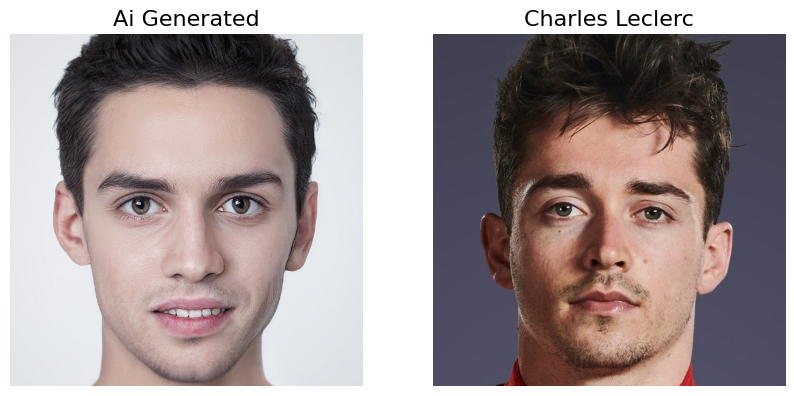

In [ ]:
#Import the OpenCV , NumPy and skimage libraries.
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
from skimage import color


face1 = imread('faceAiGenerated.jpg')
face2 = imread('face2.jpg')
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 10))

axs[0].imshow(face1)
axs[0].axis('off')
axs[0].set_title('Ai Generated', fontsize=16)

axs[1].imshow(face2)
axs[1].axis('off')
axs[1].set_title('Charles Leclerc', fontsize=16)

plt.show(plt.xticks([]), plt.yticks([]))

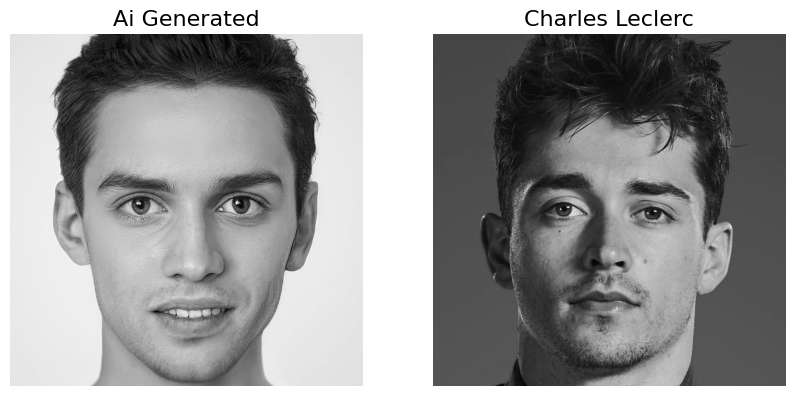

In [ ]:
#convert the color image in gray level
face1_gray =  cv2.cvtColor(face1, cv2.COLOR_BGR2GRAY)
face2_gray =  cv2.cvtColor(face2, cv2.COLOR_BGR2GRAY)

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 10))

axs[0].imshow(face1_gray,cmap='gray')
axs[0].axis('off')
axs[0].set_title('Ai Generated', fontsize=16)

axs[1].imshow(face2_gray,cmap='gray')
axs[1].axis('off')
axs[1].set_title('Charles Leclerc', fontsize=16)

plt.show(plt.xticks([]), plt.yticks([]))

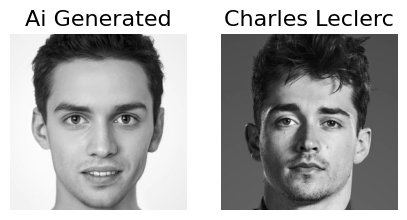

In [ ]:
width = int(128)
height = int(128)
dim = (width, height)
  
# resize image
resized1 = resize(face1_gray, (256,256)) 
resized2 = resize(face2_gray, (256,256)) 

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (5, 5))

axs[0].imshow(resized1,cmap='gray')
axs[0].axis('off')
axs[0].set_title('Ai Generated', fontsize=16)

axs[1].imshow(resized2,cmap='gray')
axs[1].axis('off')
axs[1].set_title('Charles Leclerc', fontsize=16)

plt.show(plt.xticks([]), plt.yticks([]))

<ipython-input-63-66270502df76>:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd1, hog_face1 = hog(resized1, orientations=7, pixels_per_cell=(16, 16),
<ipython-input-63-66270502df76>:5: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd2, hog_face2 = hog(resized2, orientations=7, pixels_per_cell=(16, 16),


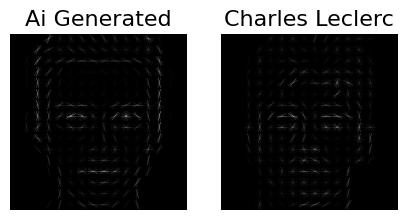

In [ ]:
#creating hog features 
fd1, hog_face1 = hog(resized1, orientations=7, pixels_per_cell=(16, 16), 
                    cells_per_block=(2, 2), visualize=True, multichannel=False)

fd2, hog_face2 = hog(resized2, orientations=7, pixels_per_cell=(16, 16), 
                    cells_per_block=(2, 2), visualize=True, multichannel=False)
                    
# Rescale histogram for better display 
hog_face1_rescaled = exposure.rescale_intensity(hog_face1, in_range=(0, 10))
hog_face2_rescaled = exposure.rescale_intensity(hog_face2, in_range=(0, 10))

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (5, 5))

axs[0].imshow(hog_face1_rescaled,cmap='gray')
axs[0].axis('off')
axs[0].set_title('Ai Generated', fontsize=16)

axs[1].imshow(hog_face2_rescaled,cmap='gray')
axs[1].axis('off')
axs[1].set_title('Charles Leclerc', fontsize=16)

plt.show(plt.xticks([]), plt.yticks([]))

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# Reshape the HOG descriptors to have a 1D array
fd1 = fd1.reshape(1, -1)
fd2 = fd2.reshape(1, -1)

# Compute the Cosine similarity between the two HOG descriptors
similarity = cosine_similarity(fd1, fd2)

# Print the similarity score
print("Cosine similarity:", similarity[0][0])

Cosine similarity: 0.7799548829953232
